# 04 Fitting Models to Data

Find the regression equation from formulas.

In [37]:
xdata = [46., 51., 54., 57., 59., 61., 63.,  66.,  68.,  72.]
ydata = [40., 55., 72., 77., 90., 96., 99., 113., 127., 132.]
n = len(xdata)
mx, my = mean(xdata), mean(ydata)
sx, sy = std(xdata), std(ydata)
r = sum((xdata[k]-mx)/sx * (ydata[k]-my)/sy for k in range(n))/(n-1)
m = r*sy/sx
b = my - m*mx
[n,mx,my,sx,sy,r,m,b]

[10,
 59.7000000000000,
 90.1000000000000,
 8.00069441430624,
 29.8084626313476,
 0.993898792824072,
 3.70300295087658,
 -130.969276167332]

Black box approach.

In [9]:
xdata = [46., 51., 54., 57., 59., 61., 63.,  66.,  68.,  72.]
ydata = [40., 55., 72., 77., 90., 96., 99., 113., 127., 132.]
data = zip(xdata,ydata)
var('m b x')
model(x) = m*x + b
bestpar = find_fit(data, model)
bestmodel(x) = model(b=bestpar[0].rhs(),m=bestpar[1].rhs())
bestmodel(x)

3.7030029535729576*x - 130.96927632830557

Compare the model to the data graphically.

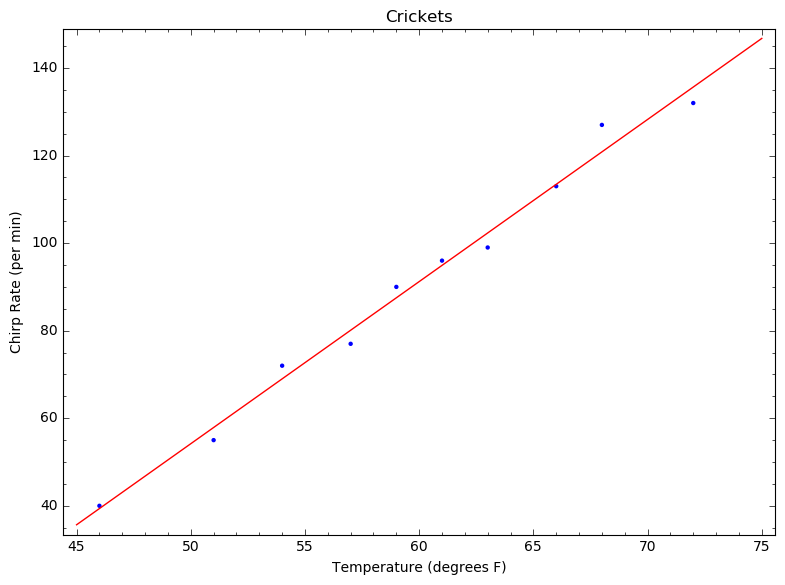

In [44]:
dataplot = list_plot(data)
modelplot = plot(bestmodel(x), 45, 75, color='red')
show(modelplot+dataplot, frame=True, title='Crickets',
     axes_labels=['Temperature (degrees F)','Chirp Rate (per min)'], 
     axes_labels_size=1, axes=False)

Compare the model to the data numerically.

In [45]:
errors = [abs(bestmodel(xdata[i])-ydata[i]) for i in range(len(xdata))]
def root_mean_square(xlist): return sqrt(mean([x^2 for x in xlist]))
[mean(errors),root_mean_square(errors),max(errors)]

[2.67630620250321, 3.11903518567815, 6.16507548534446]

## Different Criteria

We can choose the best model with respect to different criteria.  The first uses the standard minimize the sum of the squared errors:
$$\sum_{k=1}^n (y_k - mx_k - b)^2.$$
Note that we need to specify an initial guess for the parameters we need to fit, and they are listed in alphabetical order.

In [50]:
var('b m')
minimize(sum((ydata[k]-m*xdata[k]-b)^2 for k in range(n)),[-120,4])

(-130.9692761673389, 3.703002950876698)

The second minimizes the sum of the absolute values of the errors:
$$\sum_{k=1}^n \left|y_k - mx_k - b\right|.$$

In [54]:
var('b m')
minimize(sum(abs(ydata[k]-m*xdata[k]-b) for k in range(n)),[-120,4])

(-127.70115489602955, 3.6469871954447948)

The third minimizes the maximum of the absolute values of the errors:
$$\max \{ \left|y_1 - mx_1 - b\right|, \left|y_2 - mx_2 - b\right|, \ldots, \left|y_n - mx_n - b\right| \} .$$
Unfortunately, the `minimize` function does not work very well with this objective function, as can be seen when we add the `verbose` option.

In [67]:
var('b m')
minimize(max(abs(ydata[k]-m*xdata[k]-b) for k in range(n)),[-120,4],verbose=True)

         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 68
         Gradient evaluations: 56


(-120.01133679735474, 3.4785073216816254)

By thinking of $\alpha$ as the value of the objective function, we can rewrite this optimization problem as a linear program:
\begin{array}{lrcrcrcrl}
\min        &  \alpha & &      & &   &    &      &                                \\
\text{s.t.} & -\alpha &+& x_km &+& b &\leq&  y_k &\text{for } k = 1, 2, \ldots, n \\
            & -\alpha &-& x_km &-& b &\leq& -y_k &\text{for } k = 1, 2, \ldots, n \\
\end{array}
`c` is the vector of coefficients in the objective function, `G` is the matrix of coefficients on the left hand side of the inequalities, and `h` is the vector of coefficients on the right hand side of the inequalities. `RDF` indicates that we want the elements to be considered approximate real numbers (to double precision).

In [66]:
c = vector(RDF, [1,0,0])
G = matrix(RDF, [[-1,xdata[k],1] for k in range(n)]+[[-1,-xdata[k],-1] for k in range(n)])
h = vector(RDF, ydata+[-y for y in ydata])
sol = linear_program(c,G,h)
sol['x']

(4.833331121782415, 3.666666645373477, -127.16666592151577)

In summary,
\begin{array}{lrr}
\textbf{Criterion}            &    m  &    b \\
\text{root mean square error} & 3.70  & -131 \\
\text{mean error}             & 3.65  & -128 \\
\text{max error}              & 3.67  & -127 \\
\end{array}
The different criteria do not lead to very different equations.

## Transformations

The following data is the 1976 Montreal Olympic Games winning total lifts (snatch and jerk) and maximum allowable lifter weight for each bodyweight class.  All data are in units of pounds and are accurate to 0.1 pound although an individual lifter in a particular class need not weigh the maximum weight.

In [13]:
ldata = ['Fly','Bantam','Feather','Light','Middle','LightHeavy','MiddleHeavy','Heavy']
xdata = [114.5, 123.5, 132.5, 149.0, 165.5, 182.0, 198.5, 242.5];
ydata = [534.6, 578.7, 628.3, 677.9, 738.5, 804.7, 843.3, 881.8];
table(zip(ldata,xdata,ydata), header_row=['Class','Max Weight (lb)','Lift Weight (lb)'])

Class 
 Max Weight (lb) 
 Lift Weight (lb) 
 
 
 Fly 
 
 
 
 
 Bantam 
 
 
 
 
 Feather 
 
 
 
 
 Light 
 
 
 
 
 Middle 
 
 
 
 
 LightHeavy 
 
 
 
 
 MiddleHeavy 
 
 
 
 
 Heavy

If the model is of the form $y = mx + b$, then a plot of $ydata$ versus $xdata$ such look like a straight line.

In [0]:
data = zip(xdata,ydata)
list_plot(data)

If the model is of the form $y = ax^b$, then a plot of $\log(ydata)$ versus $\log(xdata)$ should look like a straight line.

In [0]:
data = zip([log(x) for x in xdata], [log(y) for y in ydata])
list_plot(data)

If the model is of the form $y = ae^{rx}$, then a plot of $\log(ydata)$ versus $xdata$ should look like a straight line.

In [0]:
data = zip(xdata,[log(y) for y in ydata])
list_plot(data)

In [18]:
data = zip(xdata,ydata)
def root_mean_square(xlist): return sqrt(mean([x^2 for x in xlist]))

In [19]:
var('m b x')
model(x) = m*x + b
bestpar = find_fit(data, model)
bestmodel(x) = model(b=bestpar[0].rhs(),m=bestpar[1].rhs())
show(bestmodel(x))
errors = [abs(bestmodel(xdata[i])-ydata[i]) for i in range(len(xdata))]
root_mean_square(errors)

31.5270278643455

In [22]:
var('a b x')
model(x) = a*x^b
bestpar = find_fit(data, model)
bestmodel(x) = model(a=bestpar[0].rhs(),b=bestpar[1].rhs())
show(bestmodel(x))
errors = [abs(bestmodel(xdata[i])-ydata[i]) for i in range(len(xdata))]
root_mean_square(errors)

27.2835208810810

In [24]:
var('a b c x')
model(x) = a*x^2 + b*x + c
bestpar = find_fit(data, model)
bestmodel(x) = model(a=bestpar[0].rhs(),b=bestpar[1].rhs(),c=bestpar[2].rhs())
show(bestmodel(x))
errors = [abs(bestmodel(xdata[i])-ydata[i]) for i in range(len(xdata))]
root_mean_square(errors)

7.47085878776644

Compare the model to the data graphically.

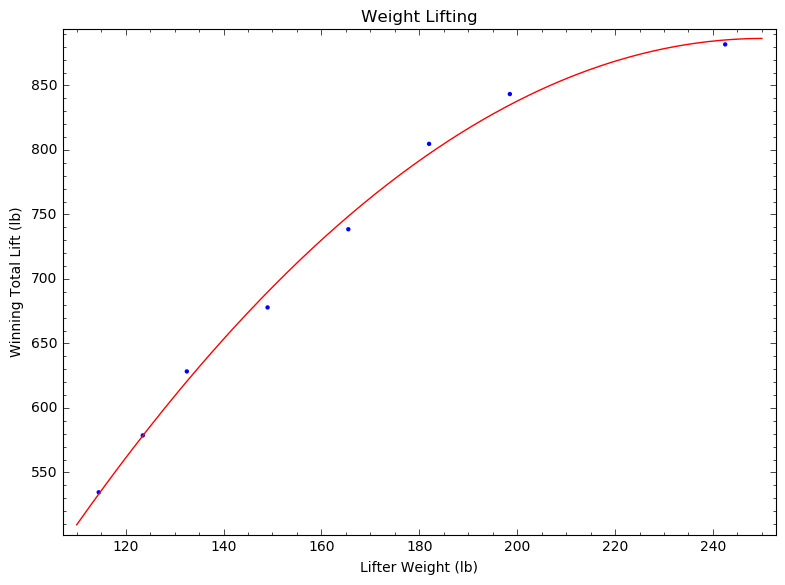

In [25]:
dataplot = list_plot(data)
modelplot = plot(bestmodel(x), 110, 250, color='red')
show(modelplot+dataplot, frame=True, title='Weight Lifting',
     axes_labels=['Lifter Weight (lb)','Winning Total Lift (lb)'], 
     axes_labels_size=1, axes=False)